# Proyek Klasifikasi Gambar Rock-Paper-Scissors



## Menyiapkan Library

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input
import numpy as np
import matplotlib.pyplot as plt
import os

## Preprocessing Data


In [9]:
training_dir = 'dataset/training/'
validation_dir = 'dataset/testing/'

In [10]:
training_datagen = ImageDataGenerator(
    rescale=1 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

training_generator = training_datagen.flow_from_directory(training_dir,
                                                    batch_size=126,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

validation_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                                batch_size=128,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))


Found 2128 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


## Membuat Model

In [11]:
pre_trained_model = MobileNetV2(weights="imagenet", include_top=False,
                                input_tensor=Input(shape=(150, 150, 3)))

for layer in pre_trained_model.layers:
    layer.trainable = False

last_output = pre_trained_model.output


In [12]:
x = tf.keras.layers.Flatten(name="flatten")(last_output)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)
x = tf.keras.layers.Dense(3, activation='softmax')(x)

model = tf.keras.models.Model(pre_trained_model.input, x)

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 75, 75, 32)   864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 75, 75, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 75, 75, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [13]:
int_lr = 1e-4
num_epochs = 10

optimizer = tf.optimizers.Adam(lr=int_lr)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])


C:\Users\dicoding\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


## Training Model

In [14]:
H = model.fit(training_generator,
              epochs=num_epochs,
              validation_data=validation_generator)


Epoch 1/10
17/17 [==============================] - 30s 2s/step - loss: 0.7429 - accuracy: 0.7561 - val_loss: 0.1429 - val_accuracy: 0.9500
Epoch 2/10
17/17 [==============================] - 29s 2s/step - loss: 0.1363 - accuracy: 0.9492 - val_loss: 0.1393 - val_accuracy: 0.9833
Epoch 3/10
17/17 [==============================] - 28s 2s/step - loss: 0.1034 - accuracy: 0.9648 - val_loss: 0.1146 - val_accuracy: 0.9833
Epoch 4/10
17/17 [==============================] - 28s 2s/step - loss: 0.0890 - accuracy: 0.9699 - val_loss: 0.0916 - val_accuracy: 0.9833
Epoch 5/10
17/17 [==============================] - 28s 2s/step - loss: 0.0682 - accuracy: 0.9774 - val_loss: 0.0898 - val_accuracy: 0.9833
Epoch 6/10
17/17 [==============================] - 27s 2s/step - loss: 0.0648 - accuracy: 0.9770 - val_loss: 0.1160 - val_accuracy: 0.9833
Epoch 7/10
17/17 [==============================] - 27s 2s/step - loss: 0.0678 - accuracy: 0.9760 - val_loss: 0.0816 - val_accuracy: 0.9833
Epoch 8/10
17/17 [==

## Evaluasi Model

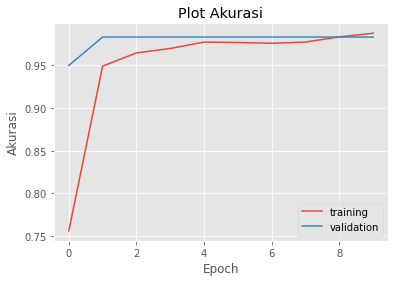

In [15]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="training")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="validation")
plt.title("Plot Akurasi")
plt.xlabel("Epoch")
plt.ylabel("Akurasi")
plt.legend()
plt.show()


## Menyimpan Model dalam Format SavedModel

In [17]:
save_path = os.path.join("models/rps_model/1/")
tf.saved_model.save(model, save_path)


INFO:tensorflow:Assets written to: models/rps_model/1/assets
